In [1]:
import pandas as pd
import datetime as dt

In [2]:
online=pd.read_csv('E:\\PYTHON\\Data\\Ch1_data\\online.csv',parse_dates=['InvoiceDate'])

In [3]:
# Define a function that will parse the date
def get_day(x):
    return dt.datetime(x.year, x.month, x.day) 

# Create InvoiceDay column
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min')

# View the top 5 rows
print(online.head())

   Unnamed: 0  InvoiceNo StockCode                      Description  Quantity  \
0      416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1      482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2      263743     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3      495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4      204384     554656     21756         BATH BUILDING BLOCK WORD         3   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
0 2011-10-25 08:26:00       2.10       14286  United Kingdom 2011-10-25   
1 2011-11-20 11:56:00       1.45       16360  United Kingdom 2011-11-20   
2 2011-07-14 13:35:00       3.75       13933  United Kingdom 2011-07-14   
3 2011-11-23 15:53:00       2.10       17290  United Kingdom 2011-11-23   
4 2011-05-25 13:36:00       5.95       17663  United Kingdom 2011-05-25   

   CohortDay  
0 2011-04-11  
1 2011-09-12  
2 2011-07-14  
3 

In [4]:
online[online.CustomerID==14286]

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11
3893,152059,549577,22584,PACK OF 6 PANNETONE GIFT BOXES,6,2011-04-11 08:16:00,2.55,14286,United Kingdom,2011-04-11,2011-04-11
4205,471736,576650,23493,VINTAGE DOILY TRAVEL SEWING KIT,10,2011-11-16 10:34:00,1.95,14286,United Kingdom,2011-11-16,2011-04-11
4688,152106,549577,22391,PAPERWEIGHT HOME SWEET HOME,6,2011-04-11 08:16:00,2.55,14286,United Kingdom,2011-04-11,2011-04-11
6086,416772,572558,23126,FELTCRAFT GIRL AMELIE KIT,4,2011-10-25 08:26:00,4.95,14286,United Kingdom,2011-10-25,2011-04-11
7416,416793,572558,22991,GIRAFFE WOODEN RULER,12,2011-10-25 08:26:00,1.95,14286,United Kingdom,2011-10-25,2011-04-11
10746,471789,576650,23194,GYMKHANA TREASURE BOOK BOX,8,2011-11-16 10:34:00,2.25,14286,United Kingdom,2011-11-16,2011-04-11
11620,152182,549577,21990,MODERN FLORAL STATIONERY SET,6,2011-04-11 08:16:00,2.95,14286,United Kingdom,2011-04-11,2011-04-11
12861,152108,549577,22536,MAGIC DRAWING SLATE PURDEY,24,2011-04-11 08:16:00,0.42,14286,United Kingdom,2011-04-11,2011-04-11
16496,416761,572558,22029,SPACEBOY BIRTHDAY CARD,12,2011-10-25 08:26:00,0.42,14286,United Kingdom,2011-10-25,2011-04-11


In [5]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [6]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

In [7]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
print(online.head())

   Unnamed: 0  InvoiceNo StockCode                      Description  Quantity  \
0      416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1      482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2      263743     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3      495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4      204384     554656     21756         BATH BUILDING BLOCK WORD         3   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
0 2011-10-25 08:26:00       2.10       14286  United Kingdom 2011-10-25   
1 2011-11-20 11:56:00       1.45       16360  United Kingdom 2011-11-20   
2 2011-07-14 13:35:00       3.75       13933  United Kingdom 2011-07-14   
3 2011-11-23 15:53:00       2.10       17290  United Kingdom 2011-11-23   
4 2011-05-25 13:36:00       5.95       17663  United Kingdom 2011-05-25   

   CohortDay  CohortIndex  
0 2011-04-11          195  
1 2011

In [8]:
grouping = online.groupby(['CohortDay', 'CohortIndex'])

In [9]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortDay', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [10]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortDay,,,,,,,,,,,,,,,,,,,,,
2010-12-01,1.0,0.043478,0.014493,NaN,0.043478,0.072464,0.028986,0.057971,0.057971,0.028986,...,0.057971,0.057971,0.086957,NaN,NaN,0.043478,0.072464,0.043478,0.057971,0.014493
2010-12-02,1.0,NaN,NaN,NaN,0.012821,0.038462,0.025641,0.051282,0.038462,NaN,...,0.025641,0.025641,NaN,NaN,0.038462,0.012821,0.025641,0.025641,0.012821,NaN
2010-12-03,1.0,NaN,0.033333,0.033333,NaN,NaN,0.033333,NaN,NaN,NaN,...,0.066667,NaN,0.033333,0.066667,0.033333,0.033333,0.033333,NaN,NaN,NaN
2010-12-05,1.0,0.050847,0.033898,0.016949,0.067797,0.033898,NaN,0.084746,0.118644,0.050847,...,0.118644,0.050847,0.033898,0.050847,0.033898,0.016949,NaN,NaN,NaN,NaN
2010-12-06,1.0,NaN,0.035088,0.017544,0.017544,NaN,0.017544,0.052632,0.105263,0.035088,...,0.017544,0.035088,0.070175,0.052632,0.017544,NaN,NaN,NaN,NaN,NaN
2010-12-07,1.0,NaN,0.027778,0.027778,NaN,NaN,0.027778,0.027778,NaN,NaN,...,0.055556,0.111111,0.055556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-08,1.0,NaN,NaN,NaN,0.028986,0.014493,0.072464,0.043478,0.014493,0.028986,...,0.072464,0.043478,0.043478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,1.0,NaN,NaN,NaN,0.019608,0.019608,0.019608,0.039216,0.039216,NaN,...,0.058824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-10,1.0,NaN,NaN,0.029412,0.088235,0.029412,0.029412,0.058824,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortDay', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortDay', columns='CohortIndex', values='UnitPrice')
print(average_quantity.round(1))

CohortIndex  1    2     3    4    5    6    7    8    9    10  ...   365  366  \
CohortDay                                                      ...              
2010-12-01   3.0  2.6   5.5  NaN  2.4  2.8  3.0  3.7  3.0  2.6 ...   2.6  2.6   
2010-12-02   3.0  NaN   NaN  NaN  1.7  2.8  2.5  4.8  3.7  NaN ...   2.6  2.8   
2010-12-03   3.3  NaN   1.9  3.0  NaN  NaN  2.9  NaN  NaN  NaN ...   2.8  NaN   
2010-12-05   2.7  2.3   2.2  2.0  4.6  2.8  NaN  2.2  3.1  3.6 ...   2.9  2.4   
2010-12-06   2.7  NaN   1.7  1.9  4.3  NaN  2.9  2.4  3.8  4.1 ...   2.1  1.2   
2010-12-07   3.3  NaN  19.9  3.8  NaN  NaN  1.9  3.5  NaN  NaN ...   1.5  1.8   
2010-12-08   2.8  NaN   NaN  NaN  2.9  1.8  4.2  3.2  1.8  2.5 ...   2.5  2.0   
2010-12-09   2.8  NaN   NaN  NaN  2.5  5.1  2.4  2.7  9.2  NaN ...   2.7  NaN   
2010-12-10   2.9  NaN   NaN  7.0  2.4  4.2  3.7  5.4  NaN  NaN ...   NaN  NaN   
2010-12-12   2.8  3.4   2.7  NaN  NaN  NaN  NaN  6.1  2.5  NaN ...   NaN  NaN   
2010-12-13   3.2  NaN   NaN 

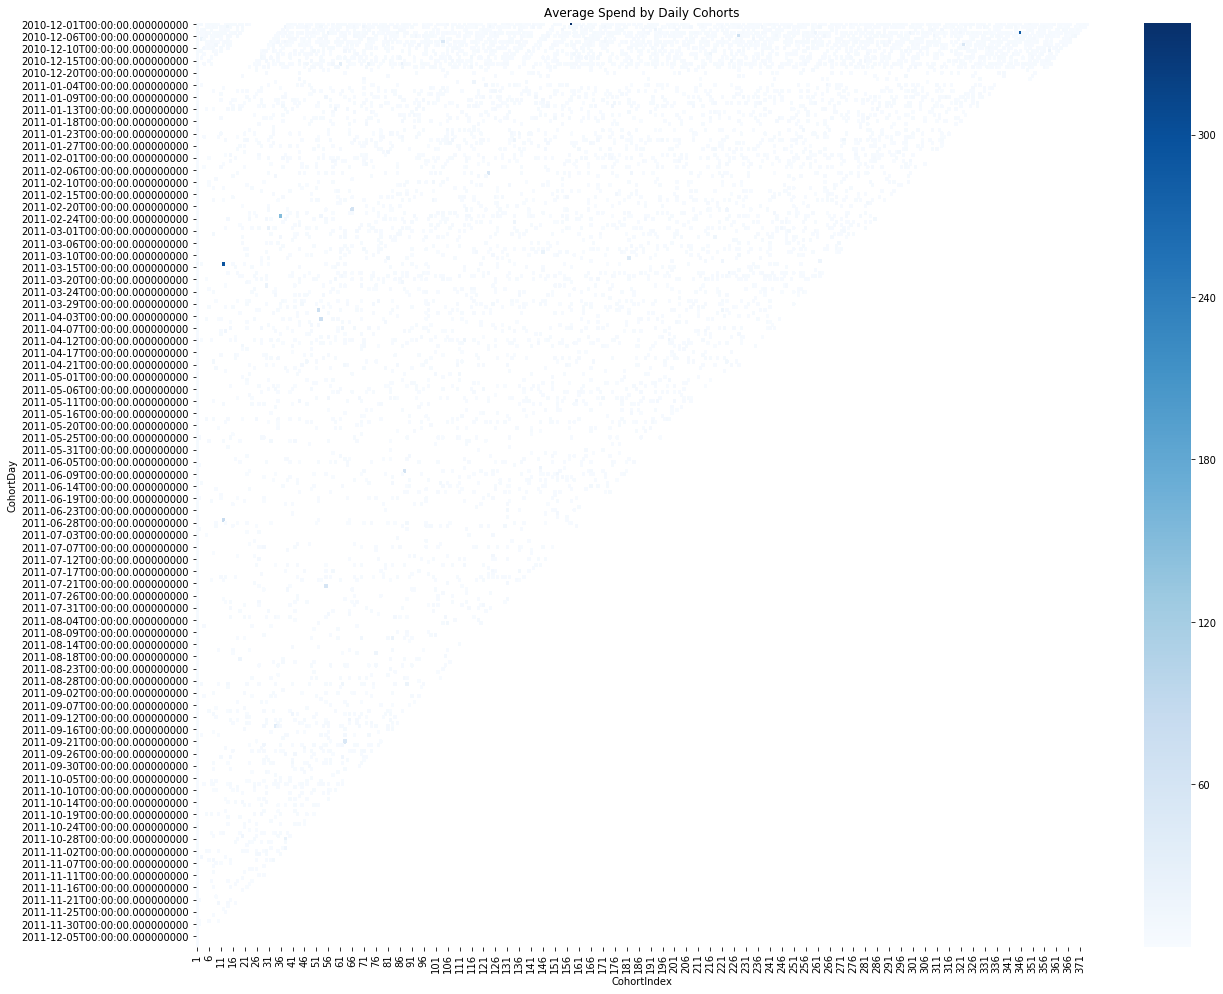

In [12]:
# Import seaborn package as sns
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(20, 17))
# Add a title
plt.title('Average Spend by Daily Cohorts')

# Create the heatmap
sns.heatmap(average_quantity, annot=False, cmap='Blues')
plt.show()

# RFM recency,frequency, monetary value

In [13]:
import numpy as np

In [14]:
np.arange(0,8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [15]:
data=pd.DataFrame({'CustomerID':np.arange(0,8),'Spend':[137,335,172,355,303,233,244,229]})

In [16]:
data

,CustomerID,Spend
0,0,137
1,1,335
2,2,172
3,3,355
4,4,303
5,5,233
6,6,244
7,7,229


In [17]:
# Create a spend quartile with 4 groups - a range between 1 and 5
spend_quartile = pd.qcut(data['Spend'], q=4, labels=range(1,5))

# Assign the quartile values to the Spend_Quartile column in data
data['Spend_Quartile'] = spend_quartile

# Print data with sorted Spend values
print(data.sort_values('Spend'))

   CustomerID  Spend Spend_Quartile
0           0    137              1
2           2    172              1
7           7    229              2
5           5    233              2
6           6    244              3
4           4    303              3
1           1    335              4
3           3    355              4


In [18]:
data=pd.DataFrame({'CustomerID':np.arange(0,8),'Recency_Days':[37,235,396,72,255,393,203,133]})
data

,CustomerID,Recency_Days
0,0,37
1,1,235
2,2,396
3,3,72
4,4,255
5,5,393
6,6,203
7,7,133


In [19]:
# Store labels from 4 to 1 in a decreasing order
r_labels = list(range(4, 0, -1))

# Create a spend quartile with 4 groups and pass the previously created labels 
recency_quartiles = pd.qcut(data['Recency_Days'], q=4, labels=r_labels)

# Assign the quartile values to the Recency_Quartile column in `data`
data['Recency_Quartile'] = recency_quartiles 

# Print `data` with sorted Recency_Days values
print(data.sort_values('Recency_Days'))

   CustomerID  Recency_Days Recency_Quartile
0           0            37                4
3           3            72                4
7           7           133                3
6           6           203                3
1           1           235                2
4           4           255                2
5           5           393                1
2           2           396                1


In [20]:
online.InvoiceDay.describe()

count                   70864
unique                    305
top       2011-12-05 00:00:00
freq                      660
first     2010-12-01 00:00:00
last      2011-12-09 00:00:00
Name: InvoiceDay, dtype: object

In [21]:
snapshot_date=online.InvoiceDay.max()+dt.timedelta(days=1)

In [22]:
snapshot_date

Timestamp('2011-12-10 00:00:00')

In [23]:
online['TotalSum']=online['Quantity']*online['UnitPrice']

In [24]:
# Calculate Recency, Frequency and Monetary value for each customer 
datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename the columns 
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

# Print top 5 rows
print(datamart.head())

            Recency  Frequency  MonetaryValue
CustomerID                                   
12747             2         27         992.82
12748             0        967        7522.06
12749             3         37         813.45
12820             3         17         268.02
12822            70          9         146.15


In [25]:
# Create labels for Recency and Frequency
r_labels = range(3, 0, -1); f_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(datamart['Recency'], q=3, labels=r_labels)

# Assign these labels to three equal percentile groups 
f_groups = pd.qcut(datamart['Frequency'], q=3, labels=f_labels)

# Create new columns R and F 
datamart = datamart.assign(R=r_groups.values, F=f_groups.values)

In [26]:
datamart

,Recency,Frequency,MonetaryValue,R,F
CustomerID,,,,,
12747,2,27,992.82,3,3
12748,0,967,7522.06,3,3
12749,3,37,813.45,3,3
12820,3,17,268.02,3,3
12822,70,9,146.15,2,2
12823,296,1,306.00,1,1
12824,59,6,106.38,2,2
12826,2,17,291.26,3,3
12827,32,2,44.55,2,1


In [27]:
# Create labels for MonetaryValue 
m_labels = range(1, 4)

# Assign these labels to three equal percentile groups
m_groups = pd.qcut(datamart['MonetaryValue'], q=3, labels=m_labels)

# Create new column M
datamart = datamart.assign(M=m_groups.values)

# Calculate RFM_Score
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
print(datamart['RFM_Score'].head())

CustomerID
12747    9.0
12748    9.0
12749    9.0
12820    9.0
12822    6.0
Name: RFM_Score, dtype: float64


In [28]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 8:
        return 'Top'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 8)):
        return 'Middle'
    else:
        return 'Low'

# Create a new variable RFM_Level
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
print(datamart.head())

            Recency  Frequency  MonetaryValue  R  F  M  RFM_Score RFM_Level
CustomerID                                                                 
12747             2         27         992.82  3  3  3        9.0       Top
12748             0        967        7522.06  3  3  3        9.0       Top
12749             3         37         813.45  3  3  3        9.0       Top
12820             3         17         268.02  3  3  3        9.0       Top
12822            70          9         146.15  2  2  2        6.0    Middle


In [29]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  
  	# Return the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         185.8       3.3          50.8  1054
Middle       81.0      10.8         206.8  1613
Top          20.0      48.3         987.6  1034


# Preproccessing data for k-means

In [30]:
import numpy as np
import pandas as pd
var1=np.array([137, 335, 172, 355, 303, 233, 244, 229, 171, 337, 381, 278, 376,
       354, 352, 256, 150, 168, 315, 341, 186, 241, 107, 122, 101, 309,
       364, 316, 241, 215, 221, 130, 171, 149, 103, 380, 143, 176, 126,
       209, 397, 115, 164, 296, 125, 326, 382, 253, 204, 122, 365, 295,
       226, 379, 255, 183, 266, 236, 388, 366, 379, 243, 339, 187, 381,
       343, 174, 290, 316, 251, 283, 359, 353, 362, 152, 102, 176, 249,
       303, 363, 177, 300, 175, 143, 120, 130, 136, 363, 157, 340, 310,
       196, 369, 110, 379, 252, 302, 248, 240, 293])
var2=np.array([ 1.84 ,  0.91 ,  4.104,  6.661, 15.285,  0.175,  0.165,  0.533,
        1.221,  2.984,  1.483,  0.08 ,  0.682,  2.81 ,  1.333,  2.588,
        0.758,  0.778,  1.262,  1.668,  1.281,  1.16 ,  0.433,  1.602,
        1.164,  4.093,  4.463,  1.26 ,  0.626,  0.451,  1.696,  1.101,
        0.651,  1.056,  0.461,  2.389,  0.572,  4.608,  1.654,  2.097,
        0.255,  1.235,  2.519,  0.304,  0.717,  1.042,  0.18 ,  1.482,
        2.874,  0.342,  1.549,  0.195,  0.953,  0.133,  4.052,  1.666,
        0.97 ,  0.38 ,  4.9  , 11.638,  0.098,  4.675,  7.62 ,  1.525,
        0.224,  2.936,  0.798,  0.471,  0.216,  1.988,  2.689,  0.459,
        1.915,  0.24 ,  2.72 ,  1.06 ,  0.792,  0.881,  2.957,  2.55 ,
        1.936,  1.187,  1.102,  2.163,  1.337,  2.343,  0.679,  0.048,
        3.655, 15.312,  1.734,  0.883,  0.843,  0.862,  1.022,  0.247,
        0.525,  0.288,  1.364,  0.691])
var3=np.array([2.89800e+00, 6.87000e-01, 8.32600e+00, 1.58200e+00, 1.10750e+02,
       1.70000e-02, 2.49000e-01, 6.93800e+00, 2.28779e+02, 5.86000e-01,
       1.09800e+00, 6.15000e-01, 1.74790e+01, 5.39000e-01, 4.31200e+00,
       5.03000e-01, 6.50000e-02, 1.96200e+00, 2.94800e+00, 1.61000e+01,
       7.89000e-01, 2.65000e-01, 3.35100e+00, 1.67700e+00, 1.82800e+00,
       8.55000e-01, 1.21010e+01, 2.21200e+00, 5.98980e+01, 1.08850e+01,
       4.12100e+00, 3.00000e-02, 3.64800e+00, 2.46700e+00, 5.71200e+00,
       9.43300e+00, 4.23000e-01, 5.87400e+00, 2.99000e-01, 6.67230e+01,
       5.70000e-02, 2.30000e-02, 2.90000e-02, 1.48000e-01, 9.00000e-02,
       6.68960e+01, 4.96000e-01, 5.60000e-02, 1.09630e+01, 2.84000e-01,
       7.00000e-02, 6.56600e+00, 3.81700e+00, 3.93000e-01, 2.05830e+01,
       1.32000e+00, 3.22790e+01, 2.94500e+00, 2.84880e+01, 1.26500e+00,
       7.30000e-02, 1.93078e+02, 3.10000e-01, 6.52000e-01, 2.22000e-01,
       6.46000e-01, 1.68400e+00, 1.54300e+00, 4.13900e+00, 4.70360e+01,
       7.72000e-01, 7.10000e-02, 7.90000e-02, 2.39000e-01, 2.70000e-02,
       5.88700e+00, 3.43000e-01, 5.13000e-01, 9.96000e-01, 5.00000e-02,
       1.57000e-01, 4.26200e+00, 3.77800e+00, 3.86000e-01, 4.89300e+01,
       6.00000e-02, 4.76000e-01, 6.09000e-01, 2.00000e-03, 6.42820e+01,
       2.19700e+00, 1.06000e-01, 8.20620e+01, 3.52000e+00, 2.51700e+00,
       2.71000e-01, 1.25600e+00, 3.80000e-02, 5.52000e+00, 4.47000e-01])
data=pd.DataFrame({'var1':var1,'var2':var2,'var3':var3})

# steps in preprocessing for k-means

## 1. make normal distribution.. (correct skewness by log transfprmation)
## 2. make mean and std similar accross variables using StandardScaler

In [31]:
# Print the average values of the variables in the dataset
print(data.mean())

# Print the standard deviation of the variables in the dataset
print(data.std())

# Get the key statistics of the dataset
print(data.describe())

var1    251.85000
var2      1.92559
var3     12.55028
dtype: float64
var1    90.993104
var2     2.583730
var3    34.516362
dtype: float64
             var1       var2        var3
count  100.000000  100.00000  100.000000
mean   251.850000    1.92559   12.550280
std     90.993104    2.58373   34.516362
min    101.000000    0.04800    0.002000
25%    171.750000    0.61250    0.280750
50%    250.000000    1.17550    1.260500
75%    339.250000    2.20800    5.568000
max    397.000000   15.31200  228.779000


C:\Users\Gaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


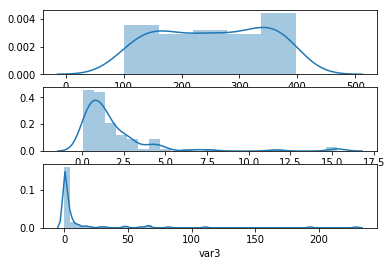

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(data['var1'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(data['var2'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(data['var3'])

# Show the plot
plt.show()

C:\Users\Gaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


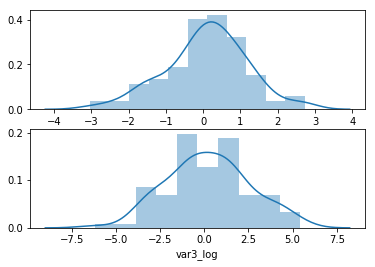

In [33]:
# Apply log transformation to var2
data['var2_log'] = np.log(data['var2'])

# Apply log transformation to var3
data['var3_log'] = np.log(data['var3'])

# Create a subplot of the distribution of var2_log
plt.subplot(2, 1, 1); sns.distplot(data['var2_log'])

# Create a subplot of the distribution of var3_log
plt.subplot(2, 1, 2); sns.distplot(data['var3_log'])

# Show the plot
plt.show()

In [34]:
# Center the data by subtracting average values from each entry
data_centered = data - data.mean()

# Scale the data by dividing each entry by standard deviation
data_scaled = data / data.std()

# Normalize the data by applying both centering and scaling
data_normalized = (data - data.mean()) / data.std()

# Print summary statistics to make sure average is zero and standard deviation is one
print(data_normalized.describe().round(2))

         var1    var2    var3  var2_log  var3_log
count  100.00  100.00  100.00    100.00    100.00
mean     0.00   -0.00    0.00     -0.00     -0.00
std      1.00    1.00    1.00      1.00      1.00
min     -1.66   -0.73   -0.36     -2.83     -2.76
25%     -0.88   -0.51   -0.36     -0.52     -0.64
50%     -0.02   -0.29   -0.33      0.07      0.01
75%      0.96    0.11   -0.20      0.64      0.64
max      1.60    5.18    6.26      2.39      2.23


In [35]:
from sklearn.preprocessing import StandardScaler
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(data)

# Scale and center the data
data_normalized = scaler.transform(data)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)

# Print summary statistics
print(data_normalized.describe().round(2))

         var1    var2    var3  var2_log  var3_log
count  100.00  100.00  100.00    100.00    100.00
mean     0.00    0.00    0.00     -0.00     -0.00
std      1.01    1.01    1.01      1.01      1.01
min     -1.67   -0.73   -0.37     -2.85     -2.77
25%     -0.88   -0.51   -0.36     -0.53     -0.64
50%     -0.02   -0.29   -0.33      0.07      0.01
75%      0.97    0.11   -0.20      0.64      0.65
max      1.60    5.21    6.30      2.41      2.24


In [36]:
datamart_rfm=datamart[['Recency','Frequency','MonetaryValue']]+0.00001
datamart_rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,2.00001,27.00001,992.82001
12748,0.00001,967.00001,7522.06001
12749,3.00001,37.00001,813.45001
12820,3.00001,17.00001,268.02001
12822,70.00001,9.00001,146.15001
12823,296.00001,1.00001,306.00001
12824,59.00001,6.00001,106.38001
12826,2.00001,17.00001,291.26001
12827,32.00001,2.00001,44.55001


C:\Users\Gaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


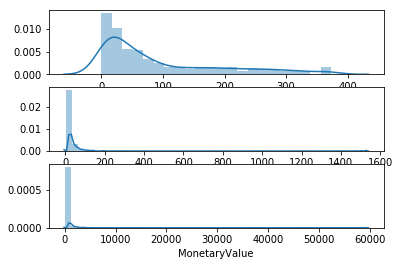

In [37]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_rfm['MonetaryValue'])

# Show the plot
plt.show()

In [38]:
# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)

In [39]:
datamart_normalized

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,-1.644217,0.909521,1.482882
12748,-8.293319,3.845056,3.022434
12749,-1.423346,1.168000,1.331390
12820,-1.423346,0.530005,0.487337
12822,0.292510,0.008267,0.026297
12823,1.077947,-1.794235,0.588089
12824,0.199383,-0.324359,-0.215172
12826,-1.644217,0.530005,0.550556
12827,-0.133888,-1.225610,-0.876902


C:\Users\Gaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


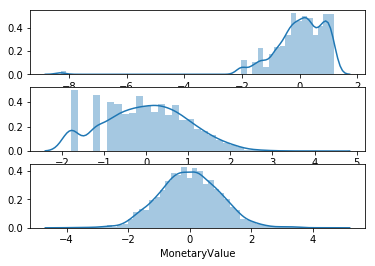

In [40]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()

# KMeans

In [41]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [42]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          15.6      55.2        1185.3   817
1          84.3      13.2         224.8  1678
2         160.0       3.0          52.1  1206

In [43]:
sse = {}

In [44]:
# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

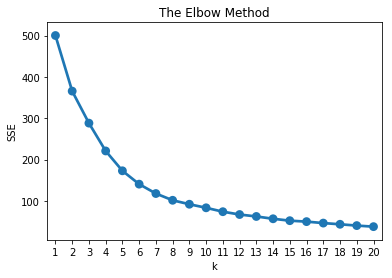

In [45]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [46]:
# Create a DataFrame by adding a new cluster label column
datamart_normalized = datamart_normalized.assign(Cluster=cluster_labels)
datamart_normalized

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747,-1.644217,0.909521,1.482882,0
12748,-8.293319,3.845056,3.022434,0
12749,-1.423346,1.168000,1.331390,0
12820,-1.423346,0.530005,0.487337,0
12822,0.292510,0.008267,0.026297,1
12823,1.077947,-1.794235,0.588089,2
12824,0.199383,-0.324359,-0.215172,1
12826,-1.644217,0.530005,0.550556,0
12827,-0.133888,-1.225610,-0.876902,2


In [47]:
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(
  					datamart_normalized.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables
                    id_vars=['CustomerID', 'Cluster'],

# Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                        
# Name the variable and value
                    var_name='Metric', value_name='Value'
					)

C:\Users\Gaya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


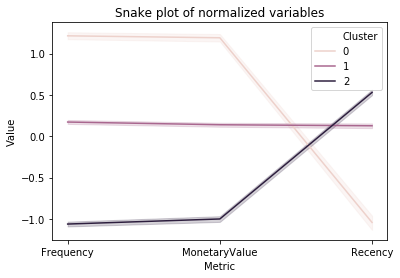

In [48]:
import seaborn as sns
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

In [50]:
datamart_rfm_k3=datamart_rfm.assign(Cluster=cluster_labels)
datamart_rfm_k3

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747,2.00001,27.00001,992.82001,0
12748,0.00001,967.00001,7522.06001,0
12749,3.00001,37.00001,813.45001,0
12820,3.00001,17.00001,268.02001,0
12822,70.00001,9.00001,146.15001,1
12823,296.00001,1.00001,306.00001,2
12824,59.00001,6.00001,106.38001,1
12826,2.00001,17.00001,291.26001,0
12827,32.00001,2.00001,44.55001,2


In [51]:
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = datamart_rfm.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance scores rounded to 2 decimals
print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue
Cluster                                   
0          -0.83       1.88           2.11
1          -0.10      -0.31          -0.41
2           0.71      -0.84          -0.86


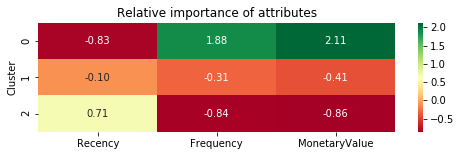

In [52]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [54]:
datamart_rfmt=pd.read_csv('E:\\PYTHON\\Data\\Ch4_data\\datamart_rfmt.csv')

In [55]:
# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Apply log transformation
datamart_rfmt_log = np.log(datamart_rfmt)

# Initialize StandardScaler and fit it 
scaler = StandardScaler(); scaler.fit(datamart_rfmt_log)

# Transform and store the scaled data as datamart_rfmt_normalized
datamart_rfmt_normalized = scaler.transform(datamart_rfmt_log)

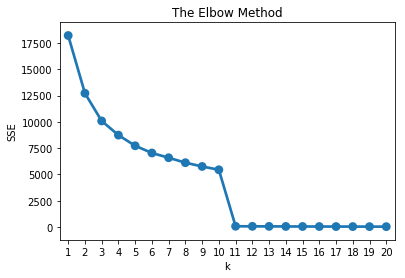

In [56]:
# Fit KMeans and calculate SSE for each k between 1 and 10
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(datamart_rfmt_normalized)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_   

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [57]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters= 4, random_state= 1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_rfmt_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [58]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfmt_k4 = datamart_rfmt.assign(Cluster=cluster_labels)

# Group by cluster
grouped = datamart_rfmt_k4.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0          26.4      42.9         887.6  274.6  1188
1          30.1       7.5         101.8   40.1   656
2         140.2       7.6         151.1  216.6   878
3         168.5       6.2         104.9  227.6   921